In [44]:
import sys
import csv
import json
import requests
import requests_cache
import numpy as np
import pandas as pd
#from yahoo_finance import Share
from pprint import pprint 
from datetime import datetime
import matplotlib.pyplot as plt
import math

import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno

In [2]:
requests_cache.install_cache('cache')

In [3]:
# Yahoo! YQL API
PUBLIC_API_URL = 'https://query.yahooapis.com/v1/public/yql'
OAUTH_API_URL = 'https://query.yahooapis.com/v1/yql'
DATATABLES_URL = 'store://datatables.org/alltableswithkeys'

def myreq(ticker, start, end):
    '''
    input ticker & dates as strings form 'YYYY-MM-DD'
    '''
    params = {'format':'json',
             'env':DATATABLES_URL}
    query = 'select * from yahoo.finance.historicaldata where symbol = "{}" and startDate = "{}" and endDate = "{}"'.format(ticker,start, end)
    params.update({'q':query})
    req = requests.get(PUBLIC_API_URL, params=params)
    req.raise_for_status()
    req = req.json()
    if req['query']['count'] > 0:
        result = req['query']['results']['quote']
        return result
    else:
        pass

In [4]:
#NEW price function
def price2(ticker):
    date=[]
    price=[]
    report = []
    
    years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
    for x in range(len(years)):
        c = myreq(ticker,'{}-01-01'.format(years[x]),'{}-12-31'.format(years[x]))
        try:
        
            for i in range(0,len(c)):
                date.append(pd.to_datetime(c[i]["Date"]))
                price.append(float(c[i][u'Close']))
                datef = pd.DataFrame(date)
                pricef = pd.DataFrame(price)
                table1 = pd.concat([datef,pricef],axis = 1)
                table1.columns = ['Date', ticker]
                table1 = table1.set_index("Date")
            
        except Exception:
            table1 = pd.DataFrame()
    
    return table1

In [5]:
csv = pd.read_csv('./companylist.csv')
# We want to keep "Finance, Health Care, Technology, Energy"
newcsv = csv[csv["Sector"].isin(["Finance", "Energy","Health Care","Technology"])].reset_index()
del newcsv["index"]

In [6]:
whole_list = newcsv['Symbol']

In [7]:
'''
for l in whole_list:
    get = price2(l)
    try:
        df = pd.concat([df,get],axis = 1)    # concat. by column 
    except NameError:
        df = pd.DataFrame(get)    # initialize automatically
# SAVE THE RESULT LOCALLY:
df.to_pickle('mydf')
'''

"\nfor l in whole_list:\n    get = price2(l)\n    try:\n        df = pd.concat([df,get],axis = 1)    # concat. by column \n    except NameError:\n        df = pd.DataFrame(get)    # initialize automatically\n# SAVE THE RESULT LOCALLY:\ndf.to_pickle('mydf')\n"

In [8]:
df = pd.read_pickle('mydf')

In [9]:
# this allows us to control size of a dataframe displayed to examine our data in depth
pd.options.display.max_columns = 20
pd.options.display.max_rows = 30

In [10]:
df.head()

,PIH,FCCY,SRCE,VNET,TWOU,JOBS,ABEO,ABIL,ABMD,AXAS,...,ZLTQ,ZN,ZION,ZIONW,ZIOP,ZIXI,ZGNX,ZSAN,ZYNE,ZNGA
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,21.499973,25.830002,NaN,NaN,14.95,0.51,NaN,9.35,5.55,...,NaN,NaN,76.480003,NaN,3.60,1.93,NaN,NaN,NaN,NaN
2006-01-04,NaN,21.499973,25.659998,NaN,NaN,14.79,0.47,NaN,9.62,5.55,...,NaN,NaN,77.019997,NaN,4.00,2.04,NaN,NaN,NaN,NaN
2006-01-05,NaN,20.999980,25.820004,NaN,NaN,16.15,0.46,NaN,9.55,5.81,...,NaN,NaN,77.720001,NaN,4.00,2.20,NaN,NaN,NaN,NaN
2006-01-06,NaN,20.519969,25.950002,NaN,NaN,17.08,0.45,NaN,9.75,5.95,...,NaN,NaN,78.529999,NaN,4.25,2.09,NaN,NaN,NaN,NaN


In [11]:
final = newcsv.reset_index()
df_long = df.transpose()
sector  = final[['Symbol','Sector']]
sector = sector.set_index('Symbol')

In [12]:
final = df_long.join(sector)

In [13]:
final = final.drop(['EVAR', 'LFVN'])

In [14]:
final.head()

,2006-01-02 00:00:00,2006-01-03 00:00:00,2006-01-04 00:00:00,2006-01-05 00:00:00,2006-01-06 00:00:00,2006-01-09 00:00:00,2006-01-10 00:00:00,2006-01-11 00:00:00,2006-01-12 00:00:00,2006-01-13 00:00:00,...,2016-12-20 00:00:00,2016-12-21 00:00:00,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,Sector
PIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.601000,7.583000,7.400000,7.650000,NaN,7.400000,7.400000,7.250000,7.800000,Finance
FCCY,NaN,21.499973,21.499973,20.999980,20.519969,20.249976,19.999980,20.369968,20.000001,20.779999,...,17.549999,17.350000,17.280001,17.350000,NaN,18.100000,18.250000,18.000000,18.700001,Finance
SRCE,NaN,25.830002,25.659998,25.820004,25.950002,25.999997,25.999997,25.999997,25.940002,25.989997,...,45.000000,44.439999,44.400002,44.200001,NaN,44.740002,44.700001,45.330002,44.660000,Finance
VNET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.320000,7.100000,6.990000,7.050000,NaN,7.150000,7.090000,6.960000,7.010000,Technology
TWOU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.049999,32.099998,30.740000,30.809999,NaN,30.549999,30.340000,29.770000,30.150000,Technology


In [15]:
hc = final[final['Sector'] == 'Health Care']

In [16]:
# take median within groups for each recorded date:
avg_sector = final.groupby('Sector').median().reset_index('Sector')
avg_sector = avg_sector.set_index('Sector')
avg_sector = avg_sector.dropna(thresh=4, axis = 1) # this drops if a column does not have at least two non NA's

In [17]:
# Dates as index for plotting
# This is basically the original DF (transposed and transposed back)
# but the columns are now the Sector averages.
avg_T = avg_sector.transpose()

In [18]:
avg_T.head()

Sector,Energy,Finance,Health Care,Technology
2006-01-03 00:00:00,13.565,23.250000,7.009993,11.245
2006-01-04 00:00:00,13.460,23.309999,6.930000,11.655
2006-01-05 00:00:00,13.750,23.459999,7.004996,11.770
2006-01-06 00:00:00,13.700,23.400000,7.033586,11.775
2006-01-09 00:00:00,13.790,23.500000,7.160000,12.050


## Volatility Analysis

In [62]:
# A new DF for the difference between each day:
delta_df = pd.DataFrame()
for sect in avg_T.columns:
    delta_df[sect] = np.log(avg_T[sect].shift(1)) - np.log(avg_T[sect])
delta_df.columns = map(lambda name: '{} Changes'.format(name),avg_T.columns)

# On what day did the stock price spike the most?
abs(delta_df).idxmax()

Energy Changes        2008-10-06
Finance Changes       2008-12-01
Health Care Changes   2008-11-19
Technology Changes    2008-12-01
dtype: datetime64[ns]

In [20]:
shade = delta_df['Energy Changes']

In [87]:
delta_df.head()

,Energy Changes,Finance Changes,Health Care Changes,Technology Changes
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.007771,-0.002577,0.011477,-0.035812
2006-01-05,-0.021316,-0.006414,-0.010764,-0.009819
2006-01-06,0.003643,0.002561,-0.004073,-0.000425
2006-01-09,-0.006548,-0.004264,-0.017813,-0.023086


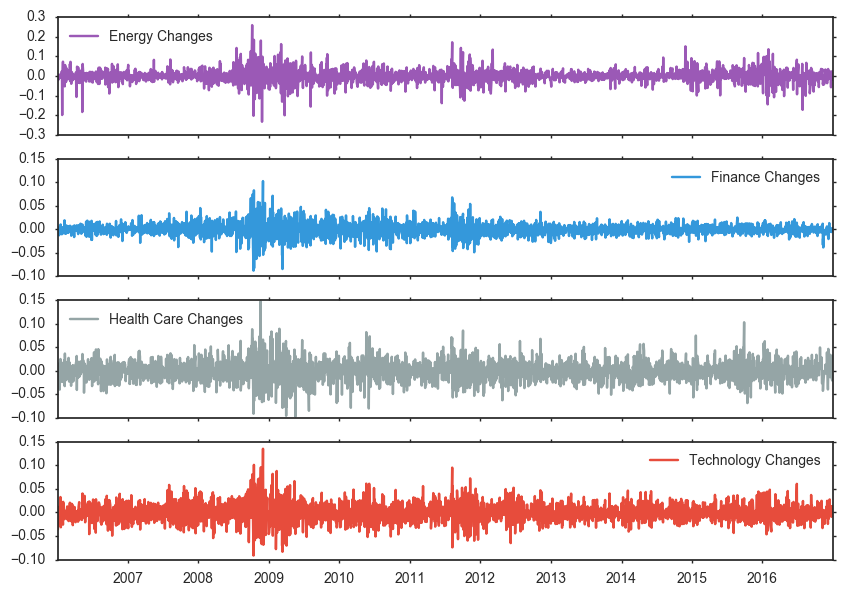

In [82]:
plot_cols = list(delta_df)

# 2 axes for 2 subplots
fig, axes = plt.subplots(4,1, figsize=(10,7), sharex=True)
#delta_df[plot_cols].plot(subplots=True, ax=axes)
delta_df[plot_cols].plot(subplots=True, ax=axes)
#plt.ylim([-0.20,0.150])
plt.show()

In [ ]:
peak = delta_df[(delta_df <= 0.10).any(axis=1)]

## Subset Data of Dataframe

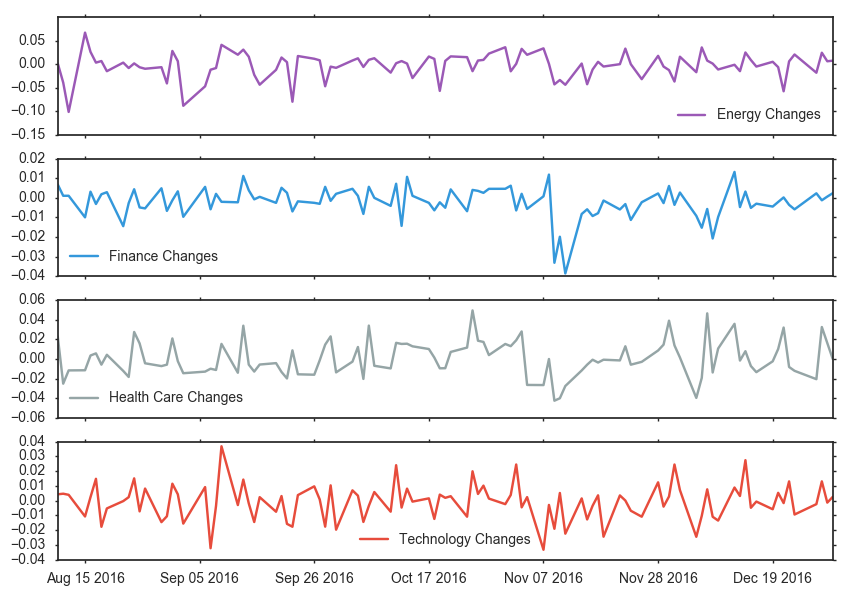

In [92]:
# 261 not right number, why is our last day 12-30-2016? -261 maybe?
year = delta_df.iloc[-100:,:]

plot_cols = list(year)

# 2 axes for 2 subplots
fig, axes = plt.subplots(4,1, figsize=(10,7), sharex=True)
#delta_df[plot_cols].plot(subplots=True, ax=axes)
year[plot_cols].plot(subplots=True, ax=axes)
#plt.ylim([-0.20,0.150])
plt.show()

#### Mega-function with everything related to the NYT API inside (work in progress)

In [29]:
from nytimesarticle import articleAPI
import time
api = articleAPI('2679a66fe8df4740b754f98e52ad068c')
def news_articles(sector,pages):
    sector_df = pd.DataFrame()
    for i in range(pages):
        try:
            if sector == 'Health Care':
                sector_articles = api.search( 
                    q = 'Health Care',
                    fq = {
                        'subject.contains':['Health', 'Care','Insurance','Drug'],
                        'type_of_material':'News'},
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                    )
            if sector == 'Technology':
                sector_articles = api.search(
                    q = 'Tech',
                    fq = {
                        'section_name':'Technology',
                        'subject.contains':'Mergers, Acquisitions and Divestitures',
                        'type_of_material':'News'
                        },
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            if sector == 'Energy':
                sector_articles = api.search( 
                    q = 'stock',
                    fq = {
                        'subject.contains':['Energy','Oil','Renewable','Gas'],
                        'section_name':'Business Day',
                        'type_of_material':'News'
                        }, 
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            if sector == 'Finance':
                sector_articles = api.search( 
                    q = 'stock',
                    fq = {
                        'subject.contains':['Bank','Financial','Loan'],
                        'section_name.contains':['Business','Finance'],
                        'type_of_material':'News'
                        }, 
                    begin_date = 20161101,
                    end_date = 20170301,
                    sort = 'oldest',
                    page = i
                )
            df_i = sector_articles['response']['docs']
            sector_df = sector_df.append(df_i) 
            time.sleep(1)   # API only allows 5 calls per second. This slows it down!
        except KeyError:
            break
        except IndexError:
            break
    return sector_df.reset_index()

In [30]:
# This stuff should be cached?
healthcare_news = news_articles('Health Care',30)

In [31]:
print healthcare_news.shape

(208, 21)


In [32]:
tech_news = news_articles('Technology',10)

In [33]:
print tech_news.shape

(7, 21)


In [34]:
energy_news = news_articles('Energy',30)

In [35]:
finance_news = news_articles('Finance',10)

In [36]:
finance_news.shape

(30, 21)

In [37]:
health_labels = [d.get('main') for d in healthcare_news.headline]
health_x = list(pd.to_datetime(healthcare_news['pub_date']))
tech_labels = [d.get('main') for d in tech_news.headline]
tech_x = list(pd.to_datetime(tech_news['pub_date']))
energy_labels = [d.get('main') for d in energy_news.headline]
energy_x = list(pd.to_datetime(energy_news['pub_date']))
finance_labels = [d.get('main') for d in finance_news.headline]
finance_x = list(pd.to_datetime(finance_news['pub_date']))

headlines = health_labels+tech_labels+energy_labels+finance_labels
pub_dates = health_x+tech_x+energy_x+finance_x

date_range = [min(pub_dates),max(pub_dates)]
sector_level = [1]*len(health_x)+[2]*len(tech_x)+[3]*len(energy_x)+[4]*len(finance_x)

### Timeline:

In [38]:
# how to create an interactive timeline
import mpld3
from mpld3 import plugins
# This is our attempt at creating an interactive "TIMELINE"
# we cannot figure out how to erase y-axis
fig, ax = plt.subplots(figsize=(12,4))
scatter = ax.scatter(pub_dates, sector_level,
           c=sector_level,marker='>', s=300)
fig.autofmt_xdate()
ax.set_xlim(date_range)
plt.yticks(range(6))
tooltip = plugins.PointLabelTooltip(scatter, headlines)
plugins.connect(fig, tooltip)
mpld3.display()

# Time Series Analysis

In [40]:
ts_eng = delta_df['Energy Changes']
# Why do we get an NA for Nov 1 2016?
# Need to change following date range
# ts_eng['2016-11-02':'2017-03-01']

## Check Stationarity

Dickey-Fuller Test: tests the null hypothesis of whether a u nit root is present in an autoregressive model.  

In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput


/Users/audreychu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/audreychu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


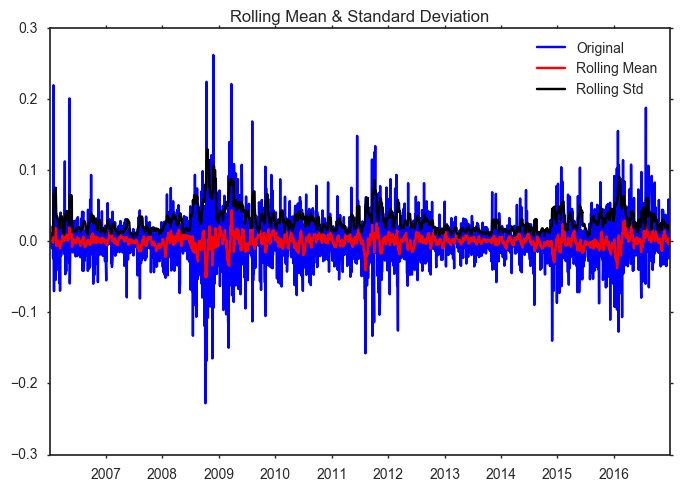

Results of Dickey-Fuller Test:


ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [42]:
test_stationarity(ts_eng)